In [2]:
from google.colab.patches import cv2_imshow
import pandas as pd

In [4]:
IMAGE_SIZE = [224,224]
train_path = "/content/drive/MyDrive/Hackerearth Dl/train"
valid_path = "/content/drive/MyDrive/Hackerearth Dl/test"
df_train = pd.read_csv("/content/drive/MyDrive/Hackerearth Dl/train.csv")

In [5]:
df_train.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [7]:
import numpy as np
uni_val = np.unique(df_train['Class'])
uni_val

array(['Airplane', 'Candle', 'Christmas_Tree', 'Jacket', 'Miscellaneous',
       'Snowman'], dtype=object)

In [8]:
len(uni_val)

6

In [9]:
from keras.applications.resnet50 import ResNet50

In [11]:
resnet = ResNet50(include_top=False,input_shape=IMAGE_SIZE+[3],weights='imagenet')

94773248/94765736 [==============================] - 3s 0us/step


In [12]:
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D,Flatten

In [15]:
flatten = Flatten()(resnet.output)
prediction = Dense(6,activation='softmax')(flatten)

In [49]:
model = Model(inputs = resnet.input,outputs=prediction)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

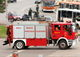

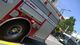

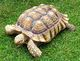

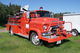

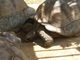

In [33]:
from glob import glob

folders = glob("/content/drive/MyDrive/Hackerearth Dl/train/*")
for i in folders[:5]:
  a = cv2.imread(i)
  cv2_imshow(a)



In [34]:
len(folders)

6469

In [35]:
from keras.preprocessing.image import  ImageDataGenerator

In [36]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.1)
# No need to generatere test gen
test_datagen = ImageDataGenerator(rescale = 1./255)

In [110]:
train_gen = train_datagen.flow_from_dataframe(
    df_train, directory=train_path, x_col='Image', y_col='Class',
    weight_col=None, target_size=(224, 224), class_mode='categorical', 
    batch_size=32, shuffle=True,subset="training")

Found 5823 validated image filenames belonging to 6 classes.


In [112]:
test_gen = train_datagen.flow_from_dataframe(df_train,directory=train_path, x_col='Image', y_col='Class',
    weight_col=None, target_size=(224, 224), class_mode='categorical', 
    batch_size=32, shuffle=False,subset="validation")

type(test_gen)


Found 646 validated image filenames belonging to 6 classes.


tensorflow.python.keras.preprocessing.image.DataFrameIterator

In [46]:
import os
images_list = os.listdir(train_path)
print(len(images_list))

6469


In [47]:
5823+646

6469

In [50]:
r = model.fit(
  train_gen,
  validation_data=test_gen,
  epochs=1,
  steps_per_epoch=train_gen.samples//32,
  validation_steps=test_gen.samples//32
)

181/181 [==============================] - 5443s 30s/step - loss: 5.6116 - accuracy: 0.5012 - val_loss: 233.7074 - val_accuracy: 0.4313


In [119]:
test = glob("/content/drive/MyDrive/Hackerearth Dl/test/*")
len(test)

3489

In [128]:
validation_generator = train_datagen.flow_from_dataframe(
        dataframe = df_train,directory = train_path,
        x_col = "Image",
        y_col = "Class",
        target_size = (224,224),
        class_mode = "categorical",
        batch_size = 32,
        subset = 'training'
)

Found 5823 validated image filenames belonging to 6 classes.


In [ ]:
prediction = model.predict(validation_generator)

In [74]:
import numpy as np

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
x = df_train['Image']
y = df_train['Class']

In [62]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.09986087494203122, random_state=42)

In [96]:
prediction = np.argmax(prediction,axis = 1)

In [97]:
df = {'Image':x_test,"Class":prediction}

In [98]:
df = pd.DataFrame(df)
df.head()

,Image,Class
2094,image6864.jpg,4
3658,image4610.jpg,4
4852,image2234.jpg,4
351,image3.jpg,4
2166,image3043.jpg,4


In [103]:
df.replace(0,'Airplane',inplace=True)
df.replace(1,'Candle',inplace=True)
df.replace(2,'Christmas_Tree',inplace=True)
df.replace(3,'Jacket',inplace=True)
df.replace(4,'Miscellaneous',inplace=True)
df.replace(5,'Snowman',inplace=True)

In [104]:
df.head()

,Image,Class
2094,image6864.jpg,Miscellaneous
3658,image4610.jpg,Miscellaneous
4852,image2234.jpg,Miscellaneous
351,image3.jpg,Miscellaneous
2166,image3043.jpg,Miscellaneous


In [105]:
df.to_csv('submission.csv',index=False)